# Análise e Exploração dos Dados

O objetivo deste notebook é, por meio dos dados pré-processados, responder algumas perguntas e tirar insights. As perguntas enviadas no documento do desafio serão tomadas como questões norteadoras das análises, portanto esse notebook será dividido em questões. Além disso, é importante ressaltar que a análise será feita com os valores fictícios que foram criados na etapa de pré-processamento.

In [1]:
import pandas as pd

In [2]:
# Setando visualização com 2 casas decimais
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_parquet('../data/preprocessed/sales_data.parquet')
df.head()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,is_affliate_purchase,new_purchase_value
1,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.27,50.00,Smart TV,Origin ef2b,0,1,60.20
2,1677087,2350,141418,2821,1083764,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.18,60.00,Smart TV,Origin ef2b,0,1,73.44
3,2017360,35669,618642,618642,1436106,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.47,0.00,Smart TV,Origin ef2b,0,0,29.65
4,2017379,57998,1164511,70388,1436118,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.40,50.00,Smart TV,Origin ef2b,0,1,39.82
5,2017382,58329,1261488,221253,1386357,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.45,50.00,Smart TV,Origin ef2b,0,1,32.13


## Questão 1

**1) A Hotmart depende dos maiores produtores da plataforma? Ou seja, os produtores que mais vendem são responsáveis pela maior parte do faturamento da Hotmart?**

 Para responder essa pergunta, primeiramente vamos conferir o período contido nos dados.

In [4]:
print("Data inicial:", min(df['purchase_date']))
print("Data final:", max(df['purchase_date']))

Data inicial: 2016-01-01 00:00:27
Data final: 2016-06-30 23:59:57


Após, é importante calcular o total de compras, o valor total de vendas e o número total de produtores:

In [5]:
# Total de Compras
purchases_total_count =  len(df.index)

# Somatório dos valores de compra
purchases_total_sum = df['new_purchase_value'].sum()

# Total de Produtores
producers_total_count = len(df['producer_id'].unique())

print("Total de compras: {:,.2f}.".format(purchases_total_count))
print("Valor total em compras no período: R${:,.2f}.".format(purchases_total_sum))
print("")
print("Total de produtores: {}.".format(producers_total_count))

Total de compras: 1,599,828.00.
Valor total em compras no período: R$159,982,803.00.

Total de produtores: 8020.


Vamos realizar o cálculo do somatório e contagem de vendas para cada produtor para posterior comparação.

In [6]:
# Seleciona apenas as colunas producer_id e new_purchase_value (valor de compra fictício)
producers = df[['producer_id', 'new_purchase_value']]

# Realiza a soma dos valores e contagem de compras de cada produtor
value_per_producer = producers.groupby('producer_id', as_index=False).agg(['sum', 'count'])
value_per_producer.columns = list(map('_'.join, value_per_producer.columns.values))
value_per_producer

,new_purchase_value_sum,new_purchase_value_count
producer_id,,
100139,"11,404.94",90
1001538,"18,381.24",102
1002204,135.36,7
1002385,337.62,9
1003087,572.74,15
...,...,...
996154,"21,316.71",69
997197,"12,613.61",32
997922,"5,306.22",196


Agora, vamos ordenar os produtores por número de vendas para descobrir qual a parcela de produtores que compõem a maior parte do faturamento.

In [7]:
# Ordenando por quantidade de compras
value_per_producer = value_per_producer.sort_values('new_purchase_value_count', ascending=False)

# Calcula qual a metade do faturamento total
half_revenues = purchases_total_sum / 2


# Essa parte conta o número dos produtores que somam
# mais de 50% do faturamento
values = value_per_producer['new_purchase_value_sum']

temp = 0

for i in range(producers_total_count):
    
    temp += values[i]
    
    if temp > half_revenues:
        break

In [8]:
print("{} ({:.2f}%) produtores, concentram mais de 50% do faturamento".format(i,(i/producers_total_count)*100))

152 (1.90%) produtores, concentram mais de 50% do faturamento


Agora, vamos ordenar pelo somatório do valor das compras, desconsiderando a quantidade de compras por produtor.

In [9]:
# Ordenando por valor em compras
value_per_producer = value_per_producer.sort_values('new_purchase_value_sum', ascending=False)

# Essa parte conta o número dos produtores que somam
# mais de 50% do faturamento
values = value_per_producer['new_purchase_value_sum']

temp = 0

for i in range(producers_total_count):
    
    temp += values[i]
    
    if temp > half_revenues:
        break

In [10]:
print("{} ({:.2f}%) produtores, concentram mais de 50% do faturamento".format(i+1,((i+1)/producers_total_count)*100))

107 (1.33%) produtores, concentram mais de 50% do faturamento


### Resposta 1

> **Resposta 1**: Por meio da análise realizada é possível dizer que a Hotmart depende dos maiores produtores da plataforma, porque mais da metade do faturamento está concentrado em menos de 2% dos produtores com maior número de vendas. Além disso, caso for desconsiderado o número de vendas, a concentração de 50% do faturamento está em um número ainda menor de produtores.

## Questão 2:

**2) Quais características mais impactam no sucesso de um produto? Ou seja, o que faz um produto vender mais?**

### Análise 1: Preço

Primeiramente, será observado o valor dos produtos, para ver se existe alguma correlação com o número de vendas.

O preço do produto está relacionado ao número de vendas?

Para responder essa questão, vamos calcular a contagem do número de vendas e também o valor médio de venda de cada produto.

In [11]:
value_per_product = df[['product_id','new_purchase_value']]
value_per_product = value_per_product.groupby('product_id', as_index=False).agg(['count', 'mean'])

value_per_product.columns = list(map('_'.join, value_per_product.columns.values))

value_per_product = value_per_product.rename(
    columns={
        'new_purchase_value_count': 'purchases',
        'new_purchase_value_mean': 'mean_value'
    }
)

value_per_product

,purchases,mean_value
product_id,,
100045,3,240.49
100090,1,46.13
100123,1,23.04
100144,1458,128.53
100200,41,508.83
...,...,...
99896,10,76.46
99913,2,30.05
99952,22,58.21


Tendo as duas colunas calculadas, podemos tentar encontrar uma correlação entre ambas.

In [12]:
# Correlação de Pearson entre o valor do produto e o número de vendas
c = value_per_product['mean_value'].corr(value_per_product['purchases'])
print("Correlação de Pearson: {}.".format(c))

Correlação de Pearson: -0.007817399850609962.


Pelo cálculo, parece haver uma pequena correlação negativa, indicando que quanto maior o valor do produto, menor o número de vendas. Essa correlação é bastante baixa, mas ela pode indicar que os produtos mais caros possuem menos compras, por isso é necessário ir mais a fundo na análise. Para melhor visualização, é possível usar um gráfico _scatter_. 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set_context('notebook')

O gráfico abaixo, parece reforçar a hipótese levantada, visto que boa parte dos produtos com muitas compras possuem valores mais baixos, enquanto os produtos com valores altos parecem não ser um destaque em compras.

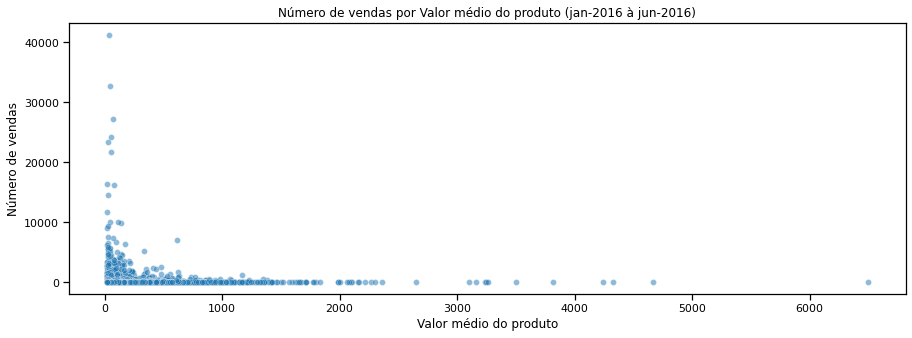

In [15]:
plt.subplots(figsize=(15,5))
plt.title('Número de vendas por Valor médio do produto (jan-2016 à jun-2016)')
plt.xlabel('Valor médio do produto')
plt.ylabel('Número de vendas')
sns.scatterplot(
    x=value_per_product['mean_value'].values,
    y=value_per_product['purchases'].values,
    alpha=0.5
)
plt.show()

Para avaliar ainda melhor, é possível fazer uma análise focada apenas nos produtos com muitas vendas.

Primeiro, vamos observar as estatísticas gerais dos produtos.

In [16]:
value_per_product.describe()

,purchases,mean_value
count,"17,883.00","17,883.00"
mean,89.46,111.32
std,678.29,190.92
min,1.00,18.81
25%,2.00,29.63
50%,7.00,47.61
75%,33.00,117.97
max,"41,220.00","6,494.83"


Seguindo a mesma lógica da questão anterior, agora vamos selecionar os produtos que somam mais de 50% das compras.

In [17]:
# Ordenamento dos produtos em ordem de compras
value_per_product = value_per_product.sort_values('purchases', ascending=False)

# Total de Produtos
total_products =  len(value_per_product.index)

# Total de Compras
total_purchases = value_per_product['purchases'].sum()

# Calcula qual a metade do total de compras
half_purchases = total_purchases / 2


# Essa parte conta o número dos produtos que somam
# mais de 50% das compras

values = value_per_product['purchases']

temp = 0

for i in range(total_products):
    
    temp += values[i]
    
    if temp > half_purchases:
        break

In [18]:
print("{} ({:.2f}%) produtos, concentram mais de 50% das compras".format(i+1,((i+1)/total_purchases)*100))

238 (0.01%) produtos, concentram mais de 50% das compras


Visto que menos de meio porcento dos produtos (apenas 238 dos 17883), concentram mais da metade das vendas, vamos olhar as estatísticas desses produtos.

In [19]:
# Como o conjunto está ordenado é podssível usar describe com head()
value_per_product.head(238).describe()

,purchases,mean_value
count,238.00,238.00
mean,"3,363.56",95.52
std,"4,781.10",123.75
min,"1,039.00",20.14
25%,"1,372.75",32.86
50%,"1,893.50",47.58
75%,"3,267.25",108.32
max,"41,220.00","1,169.32"


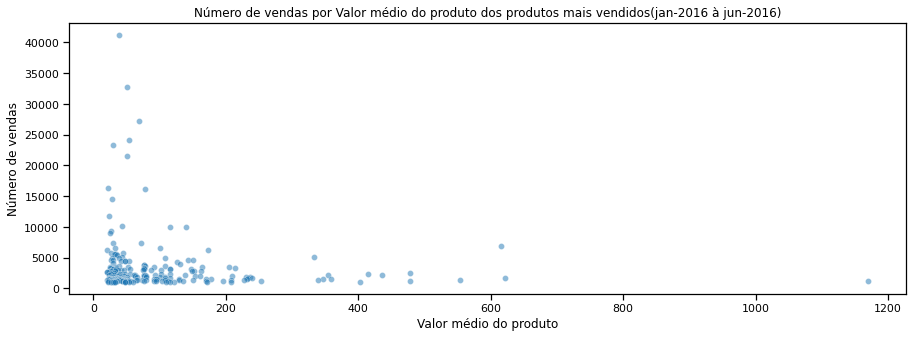

In [20]:
plt.subplots(figsize=(15,5))
plt.title('Número de vendas por Valor médio do produto dos produtos mais vendidos(jan-2016 à jun-2016)')
plt.xlabel('Valor médio do produto')
plt.ylabel('Número de vendas')
sns.scatterplot(
    x = value_per_product.head(238)['mean_value'].values,
    y = value_per_product.head(238)['purchases'].values,
    alpha = 0.5
)
plt.show()

### Análise 2: Nicho

#### Distribuição nos nichos

Primeiramente, será feita uma verificação se existe algum nicho com quantidades excepcionais de produtos de sucesso.

In [21]:
# Índices dos itens mais comprados
top_products = value_per_product.head(238).index.to_list()

Aqui os produtos mais comprados são marcados no conjunto de dados e agrupados.

In [22]:
# Marcação os produtos mais vendidos no conjunto de dados.
df_test = df[['product_id', 'product_niche']]
df_test.loc[:, 'is_success'] = 0
indexes = df_test[df_test['product_id'].isin(top_products)].index
df_test.loc[indexes, 'is_success'] = 1
df_test

# Agrupamento por produto
df_test = df_test.groupby(['product_id'], as_index=False).agg(
    {
        'product_niche': 'first',
        'is_success':'first'
    }
)

df_test

/home/felipegruend/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/felipegruend/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,product_id,product_niche,is_success
0,100045,Personal finance,0
1,100090,Economics,0
2,100123,YouTube video creation,0
3,100144,Negotiation,1
4,100200,Organization,0
...,...,...,...
17878,99896,Media training,0
17879,99913,Careers,0
17880,99952,YouTube video creation,0
17881,99968,Presentation skills,0


Nesta etapa, a contagem dos produtos de sucesso e os produtos não tão vendidos é organizada por nicho. Dessa forma, é possível ver quantos produtos de sucesso ou não estão em cada categoria.

In [23]:
# Realiza o agrupamento e contagem de produtos de sucesso
df_test = df_test.groupby(['product_niche', 'is_success'], as_index=False).count()

# Separa as contagens em dois dataframes
df_success = df_test.query('is_success == 1')
df_nsuccess = df_test.query('is_success == 0')

# E junta de forma mais organizada
df_test = pd.merge(
    df_success,
    df_nsuccess,
    on ='product_niche',
    suffixes = ("_success", "_nsuccess"),
    how = 'outer'
)

# Remoção de colunas desnecessárias
df_test = df_test.drop(['is_success_success', 'is_success_nsuccess'], axis=1)

# Preenche valores faltantes com zero e ajusta o tipo de dados
df_test = df_test.fillna(0)
df_test['product_id_success'] = df_test['product_id_success'].astype(int)
df_test

,product_niche,product_id_success,product_id_nsuccess
0,Accounting,10,305
1,Anxiety management,49,1723
2,Biology,4,328
3,Careers,6,792
4,Child psychology,2,134
5,Economics,4,923
6,Filmmaking,3,307
7,Genetics,1,185
8,Global diplomacy,2,228
9,Government,11,785


É possível observar que nenhum nicho possui um valor maior ou próximo de produtos de sucesso em relação a produtos de 'não-sucesso'.

#### Distribuição nos produtos

Nesta parte, vamos identificar quais são os nichos mais frequentos nos produtos de sucesso e compará-los com os outros produtos no geral.

In [24]:
# Coleta os nichos dos produtos mais vendidos
df_top_niche = df[df['product_id'].isin(top_products)]
df_top_niche = df_top_niche[['product_id', 'product_niche']]

In [25]:
# Nichos dos que não são os mais vendidos
df_bottom_niche = df[~df['product_id'].isin(top_products)]
df_bottom_niche = df_bottom_niche[['product_id', 'product_niche']]

In [26]:
# Agrupa por produto
df_bottom_niche = df_bottom_niche.groupby('product_id', as_index=False).first()
df_bottom_niche

,product_id,product_niche
0,100045,Personal finance
1,100090,Economics
2,100123,YouTube video creation
3,100200,Organization
4,100224,Personal finance
...,...,...
17640,99896,Media training
17641,99913,Careers
17642,99952,YouTube video creation
17643,99968,Presentation skills


Percentual de produtos por nicho dos itens que não são os mais vendidos:

In [27]:
# Agrupamento das compras por produto
df_bottom_niche = df_bottom_niche.groupby('product_id', as_index=False).first()
# Contagem do número de produtos de cada nicho
df_bottom_niche = df_bottom_niche.groupby('product_niche', as_index=False).count()
df_bottom_niche['product_percentual'] = (df_bottom_niche['product_id'] /
                                         df_bottom_niche['product_id'].sum()) * 100

# Remoção da coluna de contagem, mantendo apenas a coluna de percentual de produto
df_bottom_niche = df_bottom_niche.drop('product_id', axis=1)

df_bottom_niche

,product_niche,product_percentual
0,Accounting,1.73
1,Anxiety management,9.76
2,Biology,1.86
3,Careers,4.49
4,Child psychology,0.76
5,Disease,0.77
6,Economics,5.23
7,Filmmaking,1.74
8,Genetics,1.05
9,Global diplomacy,1.29


Percentual de produtos por nicho dos itens mais vendidos:

In [28]:
# Agrupamento das compras por produto
df_top_niche = df_top_niche.groupby('product_id', as_index=False).first()
# Contagem do número de produtos de cada nicho
df_top_niche = df_top_niche.groupby('product_niche', as_index=False).count()
df_top_niche['product_percentual'] = (df_top_niche['product_id'] /
                                         df_top_niche['product_id'].sum()) * 100

# Remoção da coluna de contagem, mantendo apenas a coluna de percentual de produto
df_top_niche = df_top_niche.drop('product_id', axis=1)

df_top_niche

,product_niche,product_percentual
0,Accounting,4.20
1,Anxiety management,20.59
2,Biology,1.68
3,Careers,2.52
4,Child psychology,0.84
5,Economics,1.68
6,Filmmaking,1.26
7,Genetics,0.42
8,Global diplomacy,0.84
9,Government,4.62


Comparação entre o percentual de produtos em cada nicho, em relação a produtos mais vendidos e menos vendidos:

In [29]:
df_niches = pd.merge(
    df_bottom_niche,
    df_top_niche,
    on='product_niche',
    how='outer',
    suffixes=("_bottom", "_top")
).fillna(0)

df_niches['dif'] = df_niches['product_percentual_top'] - df_niches['product_percentual_bottom'] 

In [30]:
df_niches.sort_values('dif')

,product_niche,product_percentual_bottom,product_percentual_top,dif
16,Personal finance,14.85,10.92,-3.93
6,Economics,5.23,1.68,-3.55
18,Presentation skills,12.02,9.24,-2.78
3,Careers,4.49,2.52,-1.97
20,Storytelling,1.22,0.00,-1.22
14,Online course creation,4.48,3.36,-1.12
21,Teaching English,2.10,1.26,-0.84
5,Disease,0.77,0.00,-0.77
12,Media training,2.87,2.10,-0.77
8,Genetics,1.05,0.42,-0.63


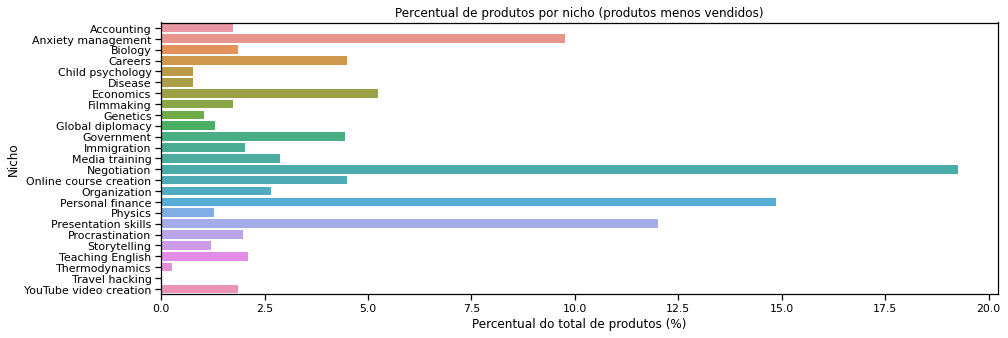

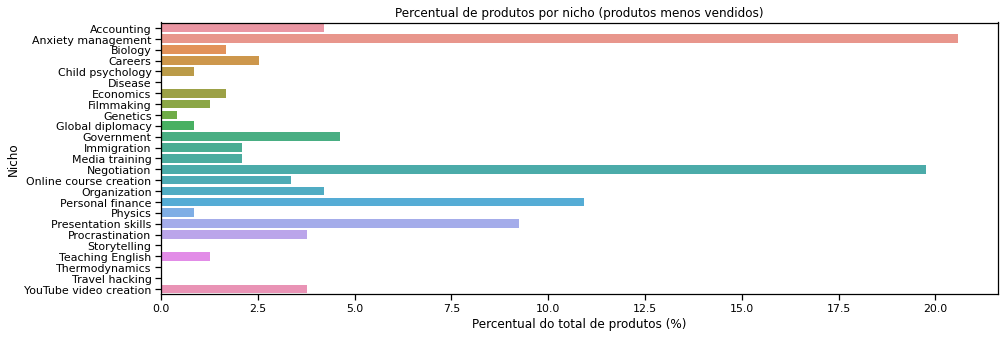

In [31]:
# Menos Vendidos
plt.subplots(figsize=(15,5))
plt.title('Percentual de produtos por nicho (produtos menos vendidos)')
sns.barplot(x='product_percentual_bottom', y='product_niche', data=df_niches)
plt.xlabel('Percentual do total de produtos (%)')
plt.ylabel('Nicho')
plt.show()

# Mais vendidos
plt.subplots(figsize=(15,5))
plt.title('Percentual de produtos por nicho (produtos menos vendidos)')
sns.barplot(x='product_percentual_top', y='product_niche', data=df_niches)
plt.xlabel('Percentual do total de produtos (%)')
plt.ylabel('Nicho')
plt.show()

### Resposta 2

> **Resposta 2:**

> Nessa etapa, foram considerados produtos de sucesso aqueles que possuem mais vendas e que somados, representam mais de 50% das vendas totais.

> Em relação aos atributos numéricos, uma das características dos produtos de sucesso é o preço 'baixo', pois 75% dos produtos mais comprados custam menos de 108,32 reais, valor um pouco abaixo da média geral. Contudo, a maioria dos produtos custa menos de 117,97 reais, portanto preços mais baixos não são exclusivos dos produtos de sucesso. Por isso, para descobrir características específicas, seria necessária uma análise mais completa. Outros dados numéricos poderiam ser levados em conta, como por exemplo a idade do produto no momento da compra ou o próprio z-score.

> Já em relação às variáveis categóricas, foi feita uma análise superficial dos nichos mais presentes nos produtos mais vendidos em comparação com os menos vendidos. Com isso foi possível identificar que ainda não existem produtos de sucesso nos nichos de: "Thermodynamics", "Storytelling", "Disease" e "Travel hacking". Além disso, mais de 20% dos produtos de sucesso são do nicho de "Anxiety management". Contudo, não existe um nicho específico que tenha mais concentração de produtos de sucesso do que produtos normais ou pouco vendidos.

## Questão 3

**3) É possível estimar quanto de faturamento a Hotmart irá fazer nos próximos três meses a partir do último mês mostrado no dataset?**

> **Resposta 3**: 

> Sobre essa questão, a resposta é: sim, é possível realizar uma estimativa de faturamento dos próximos meses a partir do _dataset_. Contudo, como o período dos dados fornecidos é de apenas 6 meses, a avaliação dessa estimativa ficaria comprometia, pois, caso sejam usados alguns meses como conjunto de validação, o conjunto de treinamento para um modelo qualquer ficaria muito pequeno.

> Mesmo assim, é possível fazer uma demonstração de como seria uma previsão para os próximos meses, por isso, após a resposta, está apresentado um forecast para três meses no futuro. Para esse exemplo será usada a ferramenta desenvolvida pelo Facebook chamada Prophet.

In [32]:
# Importação da biblioteca
from prophet import Prophet

Leitura dos dados do valor e data da compra e renomeação das colunas de data para `ds` e valor da compra para `y`, de acordo com o exigido pelo Prophet.

In [55]:
profet_df = df[['purchase_date', 'new_purchase_value']]
profet_df = profet_df.rename(columns={'purchase_date':'ds', 'new_purchase_value':'y'})
profet_df

,ds,y
1,2016-06-26 12:00:00,60.20
2,2016-06-26 12:00:00,73.44
3,2016-06-26 12:00:00,29.65
4,2016-06-26 12:00:00,39.82
5,2016-06-26 12:00:00,32.13
...,...,...
1599824,2016-06-30 23:59:57,48.20
1599825,2016-06-30 21:40:11,29.23
1599826,2016-05-13 16:45:42,46.13
1599827,2016-06-22 14:39:05,46.13


Como a previsão testada será mensal, serão as compras serão agrupadas por mês. Portanto, cada mês conta com o valor total de compras.

In [56]:
profet_df = profet_df.resample('M', on='ds').sum().reset_index()
profet_df

,ds,y
0,2016-01-31,"24,163,972.99"
1,2016-02-29,"18,654,397.84"
2,2016-03-31,"33,849,083.49"
3,2016-04-30,"26,818,762.77"
4,2016-05-31,"28,440,449.06"
5,2016-06-30,"28,056,136.84"


Com os valores de compra mensais estabelecidos e a nomenclatura correta, é possível dar _fit_ no modelo.

In [57]:
m = Prophet()
m.fit(profet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.


Então são feitas as predições de  3 meses a partir dos dados fornecidos. Os valores da colunas `yhat` representam os valores estmados para os próximos meses.

In [60]:
future = m.make_future_dataframe(periods=3, freq='M')
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail(3)

,ds,yhat
6,2016-07-31,"30,900,889.20"
7,2016-08-31,"32,131,166.40"
8,2016-09-30,"33,321,757.24"


Ainda, é possível visualizar em gráfico a curva estimada.

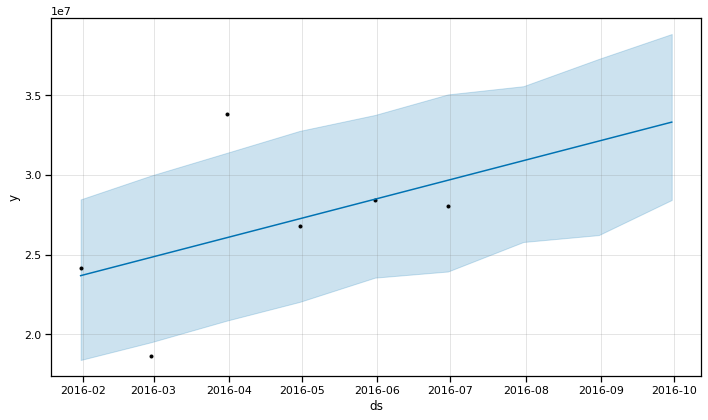

In [54]:
fig1 = m.plot(forecast)

Bem como a tendência projetada para os próximos meses

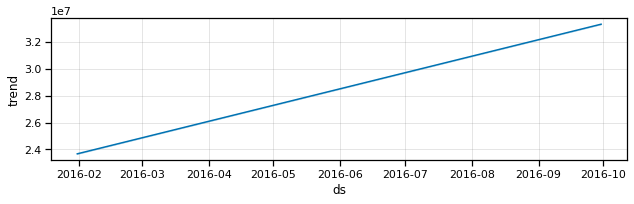

In [64]:
fig2 = m.plot_components(forecast)